In [ ]:
import math
import matplotlib.pyplot as plt


def _get_cosine_schedule_with_min_lr_lambda(current_step, *, num_warmup_steps, num_training_steps, num_cycles, min_lr_ratio):
    if current_step < num_warmup_steps:
        return float(current_step) / float(max(1, num_warmup_steps))
    progress = float(current_step - num_warmup_steps) / float(max(1, num_training_steps - num_warmup_steps))
    cosine_decay = 0.5 * (1.0 + math.cos(math.pi * float(num_cycles) * 2.0 * progress))
    return min_lr_ratio + (1.0 - min_lr_ratio) * cosine_decay


num_training_steps = 1000
num_warmup_steps = 200
min_lr_ratio = 0
num_cycles = 0.5

lr_values = [_get_cosine_schedule_with_min_lr_lambda(step, num_warmup_steps=num_warmup_steps, num_training_steps=num_training_steps, num_cycles=num_cycles, min_lr_ratio=min_lr_ratio) for step in range(num_training_steps)]

plt.plot(lr_values)
plt.xlabel("Training steps")
plt.ylabel("Learning rate")
plt.title("Cosine schedule with min LR")
plt.show()


In [ ]:
def _get_cosine_schedule_with_min_lr_lambda(current_step, *, num_warmup_steps, num_training_steps, num_cycles, min_lr_ratio):
    if current_step < num_warmup_steps:
        return float(current_step) / float(max(1, num_warmup_steps))
    progress = float(current_step - num_warmup_steps) / float(max(1, num_training_steps - num_warmup_steps))
    cosine_decay = 0.5 * (1.0 + math.cos(math.pi * float(num_cycles) * 2.0 * progress))
    return min_lr_ratio + (1.0 - min_lr_ratio) * cosine_decay


In [ ]:
from functools import partial
from torch.optim.lr_scheduler import LambdaLR


def get_cyclical_cosine_schedule_with_min_lr(optimizer, num_warmup_steps, cycle_length, num_cycles=0.5, min_lr_ratio=0.1, last_epoch=-1):
    lr_lambda = partial(
        _get_cyclical_cosine_schedule_with_min_lr_lambda,
        num_warmup_steps=num_warmup_steps,
        cycle_length=cycle_length,
        num_cycles=num_cycles,
        min_lr_ratio=min_lr_ratio,
    )
    return LambdaLR(optimizer, lr_lambda, last_epoch)


def _get_cyclical_cosine_schedule_with_min_lr_lambda(current_step, *, num_warmup_steps, cycle_length, min_lr_ratio):
    assert 0 < min_lr_ratio <= 1.0, "min_lr_ratio must be in (0,1]"

    # compute where we are in the current cycle
    cycle_step = current_step % cycle_length
    
    if cycle_step < num_warmup_steps:
        return float(cycle_step) / float(max(1, num_warmup_steps))
    
    progress = float(cycle_step - num_warmup_steps) / float(max(1, cycle_length - num_warmup_steps))
    cosine_decay = 0.5 * (1.0 + math.cos(math.pi * progress))
    
    return min_lr_ratio + (1.0 - min_lr_ratio) * cosine_decay


import matplotlib.pyplot as plt
import numpy as np
import math
from functools import partial

num_training_steps = 10000
num_warmup_steps = 1000
cycle_length = 2000
num_cycles=num_training_steps / cycle_length
min_lr_ratio=0.1

lr_lambda = partial(
    _get_cyclical_cosine_schedule_with_min_lr_lambda,
    num_warmup_steps=num_warmup_steps,
    cycle_length=cycle_length,
    min_lr_ratio=min_lr_ratio,
)

# Generate a range of step values
steps = np.arange(0, num_training_steps, 100)

# Compute learning rate for each step
lr_values = [lr_lambda(step) for step in steps]

# Plot the learning rate schedule
plt.plot(steps, lr_values)
plt.title('Cyclical Cosine Schedule with Min LR')
plt.xlabel('Step')
plt.ylabel('Learning Rate')
plt.grid(True)
plt.show()


In [ ]:
from functools import partial
from torch.optim.lr_scheduler import LambdaLR


def get_cosine_schedule_with_restarts(optimizer, num_warmup_steps, cycle_length, num_cycles=0.5, min_lr_ratio=0.1, last_epoch=-1):
    lr_lambda = partial(
        _get_cosine_schedule_with_restarts_lambda,
        num_warmup_steps=num_warmup_steps,
        cycle_length=cycle_length,
        num_cycles=num_cycles,
        min_lr_ratio=min_lr_ratio,
    )
    return LambdaLR(optimizer, lr_lambda, last_epoch)


def _get_cosine_schedule_with_restarts_lambda(current_step, *, num_warmup_steps, cycle_length, min_lr_ratio):
    assert 0 < min_lr_ratio <= 1.0, "min_lr_ratio must be in (0,1]"

    # compute where we are in the current cycle
    cycle_step = current_step % cycle_length
    
    if cycle_step < num_warmup_steps:
        return float(cycle_step) / float(max(1, num_warmup_steps))
    
    progress = float(cycle_step - num_warmup_steps) / float(max(1, cycle_length - num_warmup_steps))
    cosine_decay = 0.5 * (1.0 + math.cos(math.pi * progress))
    
    return min_lr_ratio + (1.0 - min_lr_ratio) * cosine_decay


import matplotlib.pyplot as plt
import numpy as np
import math
from functools import partial

num_training_steps = 10000
num_warmup_steps = 1000
cycle_length = 10000
num_cycles=num_training_steps / cycle_length
min_lr_ratio=0.1

lr_lambda = partial(
    _get_cyclical_cosine_schedule_with_min_lr_lambda,
    num_warmup_steps=num_warmup_steps,
    cycle_length=cycle_length,
    min_lr_ratio=min_lr_ratio,
)

# Generate a range of step values
steps = np.arange(0, num_training_steps, 100)

# Compute learning rate for each step
lr_values = [lr_lambda(step) for step in steps]

# Plot the learning rate schedule
plt.plot(steps, lr_values)
plt.title('Cyclical Cosine Schedule with Min LR')
plt.xlabel('Step')
plt.ylabel('Learning Rate')
plt.grid(True)
plt.show()


In [ ]:
import math

# --warmup_steps 500 --restart_warmup_steps 400 --cycle_length 1000 --num_training_steps 10000 --min_lr_ratio 0.1
def jagged_cosine_schedule(step, *, first_warmup_steps, restart_warmup_steps, restart_every, min_lr_ratio):
    assert 0 < min_lr_ratio <= 1.0, "min_lr_ratio must be in (0,1]"
    assert restart_every > 0, "restart_every must be positive"

    if step < first_warmup_steps:
        return float(step) / float(max(1, first_warmup_steps))

    restart_step = step % restart_every
    restart_number = step // restart_every

    if restart_step < restart_warmup_steps:
        # get expected lr multipler at the end of the warmup
        end_of_warmup_progress = (
            float(restart_number * restart_every) /
            float(max(1, num_training_steps - first_warmup_steps))
        )

        _cosine_decay = 0.5 * (1.0 + math.cos(math.pi * end_of_warmup_progress))
        warmup_lr_multiplier = min_lr_ratio + (1.0 - min_lr_ratio) * _cosine_decay
    
        return float(restart_step) / float(max(1, restart_warmup_steps)) * warmup_lr_multiplier

    progress = float(step - first_warmup_steps) / float(max(1, num_training_steps - first_warmup_steps))
    cosine_decay = 0.5 * (1.0 + math.cos(math.pi * progress))

    return min_lr_ratio + (1.0 - min_lr_ratio) * cosine_decay


# plot
import matplotlib.pyplot as plt
import numpy as np

num_training_steps = 10000
first_warmup_steps = 1000
restart_warmup_steps = 100
restart_every = 2000
min_lr_ratio=0.1

# Generate a range of step values
steps = np.arange(0, num_training_steps, 10)

# Compute learning rate for each step
lr_values = [
    jagged_cosine_schedule(
        step,
        first_warmup_steps=first_warmup_steps,
        restart_warmup_steps=restart_warmup_steps,
        restart_every=restart_every,
        min_lr_ratio=min_lr_ratio,
    )
    for step in steps
]

# Plot the learning rate schedule
# figure
fig = plt.figure(figsize=(5, 3), dpi=150)
plt.plot(steps, lr_values)
# plt.title('Jagged Cosine Schedule')
plt.xlabel('Step')
plt.ylabel('Learning Rate')
plt.grid(True)

# tight
plt.tight_layout()
plt.savefig("jagged_cosine_schedule.pdf")
plt.show()


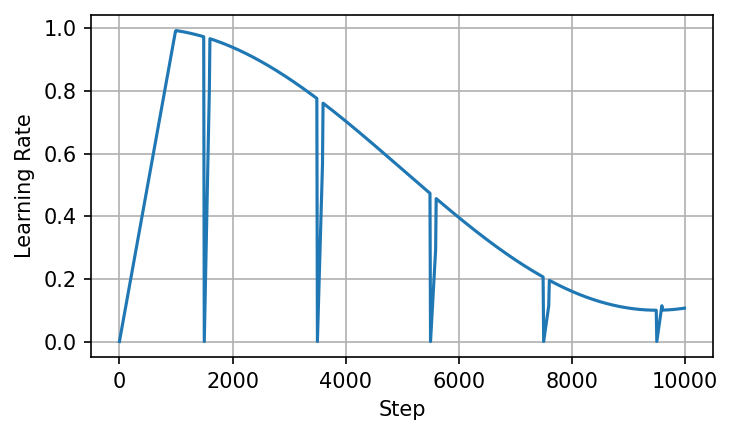

In [6]:
import math
def _get_cosine_schedule_with_multiple_warmups_lambda(
    current_step,
    *,
    num_training_steps,
    first_warmup_steps,
    restart_warmup_steps,
    restart_every,
    min_lr_ratio,
    start_step,
):
    """
    Args:
        start_step: useful when continuing training from a warmed up checkpoint,
            it allows to sync the resets by reducing the number of steps
            after the first warmup and before the first reset.
            Thus, your ReLoRA resets can be synced with the optimizer resets.
    """
    assert 0 < min_lr_ratio <= 1.0, "min_lr_ratio must be in (0,1]"
    assert restart_every > 0, "restart_every must be positive"
    assert start_step + first_warmup_steps < num_training_steps, "warmup + start_step is more than full training steps"
    assert start_step + first_warmup_steps < restart_every, "the first reset will happen before the warmup is done"

    if current_step < first_warmup_steps:
        return float(current_step) / float(max(1, first_warmup_steps))

    _current_step = current_step + start_step

    restart_step = _current_step % restart_every
    restart_number = _current_step // restart_every

    if restart_step < restart_warmup_steps:
        # get expected lr multipler at the end of the warmup
        end_of_warmup_progress = (
            float(restart_number * restart_every) /
            float(max(1, num_training_steps - first_warmup_steps))
        )

        _cosine_decay = 0.5 * (1.0 + math.cos(math.pi * end_of_warmup_progress))
        warmup_lr_multiplier = min_lr_ratio + (1.0 - min_lr_ratio) * _cosine_decay

        return float(restart_step) / float(max(1, restart_warmup_steps)) * warmup_lr_multiplier

    progress = float(_current_step - first_warmup_steps) / float(max(1, num_training_steps - first_warmup_steps))
    cosine_decay = 0.5 * (1.0 + math.cos(math.pi * progress))

    return min_lr_ratio + (1.0 - min_lr_ratio) * cosine_decay


# plot
import matplotlib.pyplot as plt
import numpy as np

num_training_steps = 10000
first_warmup_steps = 1000
restart_warmup_steps = 100
restart_every = 2000
min_lr_ratio = 0.1
start_step = 500

# Generate a range of step values
steps = np.arange(0, num_training_steps, 10)

# Compute learning rate for each step
lr_values = [
    _get_cosine_schedule_with_multiple_warmups_lambda(
        step,
        first_warmup_steps=first_warmup_steps,
        restart_warmup_steps=restart_warmup_steps,
        restart_every=restart_every,
        min_lr_ratio=min_lr_ratio,
        start_step=start_step,
        num_training_steps=num_training_steps,
    )
    for step in steps
]

# Plot the learning rate schedule
# figure
fig = plt.figure(figsize=(5, 3), dpi=150)
plt.plot(steps, lr_values)
# plt.title('Jagged Cosine Schedule')
plt.xlabel('Step')
plt.ylabel('Learning Rate')
plt.grid(True)

# tight
plt.tight_layout()
plt.show()
